# Analysis on Bank Marketing Dataset

Business Problem: Based on previous marketing campaigns, how should a financial instituion target audience for increased subscription for term deposit.

## Topic of Contents:
* [Understanding Data](#first-bullet)
* [Basic Data Analysis](#second-bullet)
* [Effects of banking data on Term Deposit](#third-bullet)
* [Effect of Campaign on Term Deposit](#four-bullet)
* [Additioanl Attribute Effects](#five-bullet)
* [Data Preprocessing](#six-bullet)
* [Data Modelling](#seven-bullet)
* [Model Analysis](#eight-bullet)
* [Results](#nine-bullet)
* [Future Leads to Marketing Campaigns](#ten-bullet)


## Understanding Data <a class="anchor" id="first-bullet"></a>

## Basic Data Analysis <a class="anchor" id="second-bullet"></a>

In [157]:
# import basic libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [164]:
path = 'C:/Users/MANEET/bank_marketing'
data_add = '/data'
figures = '/figures'

In [167]:
df = pd.read_csv(path + data_add +'./raw/bank-additional-full.csv', delimiter = ';')

In [168]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [169]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [171]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

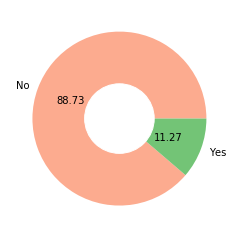

In [172]:
labels = ['No','Yes']
cmap1 = plt.cm.Reds
cmap2 = plt.cm.Greens
colors = [cmap1(0.3),cmap2(0.5)]
plt.pie(df["y"].value_counts(), labels = labels, colors = colors ,autopct="%.2f")
# add a white circle at the center
my_circle=plt.Circle( (0,0), 0.4, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

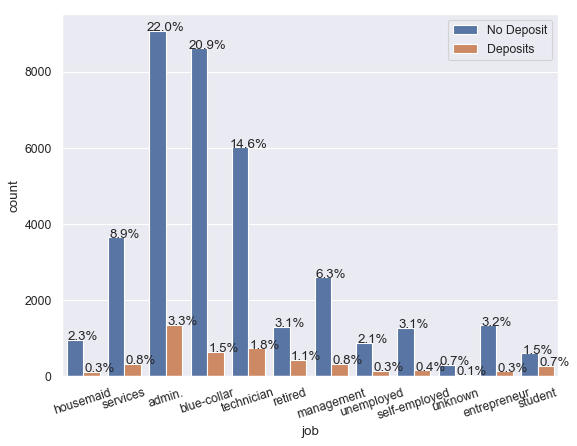

In [200]:
# sns.set_theme(style="darkgrid")

plt.figure(figsize=(8, 6), dpi=80)
ax = sns.countplot(x = "job", hue = 'y', data = df)
plt.xticks(rotation=18)
plt.legend(["No Deposit", "Deposits"])
total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()


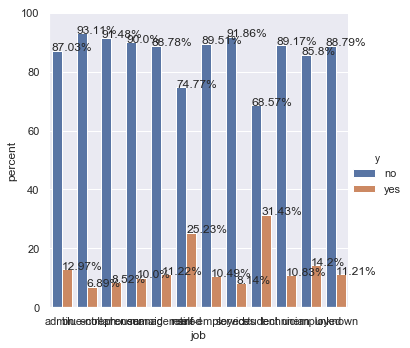

<Figure size 720x576 with 0 Axes>

In [226]:

x,y = 'job','y'
df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)


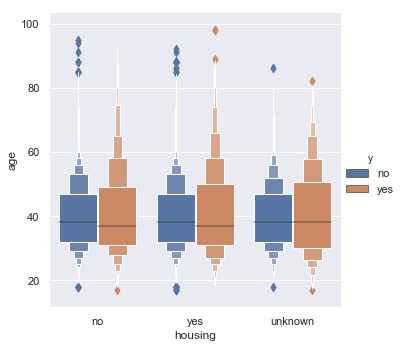

In [237]:
sns.catplot(x = "housing", y ='age', hue = 'y', kind = 'boxen', data = df)

## Effects of banking data on Term Deposit <a class="anchor" id="third-bullet"></a>

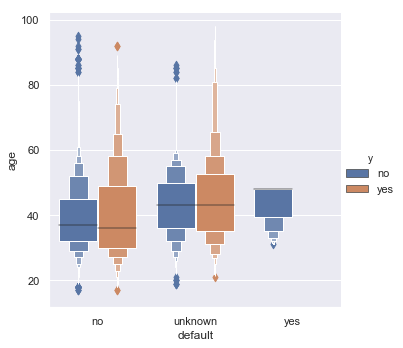

In [234]:
sns.catplot(x = "default", y ='age', hue = 'y', kind = 'boxen', data = df)

## Effect of Campaign on Term Deposit <a class="anchor" id="four-bullet"></a>

## Additioanl Attribute Effects <a class="anchor" id="five-bullet"></a>

## Data Preprocessing <a class="anchor" id="six-bullet"></a>

## Data Modelling <a class="anchor" id="seven-bullet"></a>

##  Model Analysis <a class="anchor" id="eight-bullet"></a>

## Results <a class="anchor" id="nine-bullet"></a>

## Future Leads to Marketing Campaigns <a class="anchor" id="ten-bullet"></a>

## Analysis of banking Attributes <a class="anchor" id="second-bullet"></a>

In [43]:
import pandas as pd

In [140]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [143]:
df.shape

(41188, 21)

In [144]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [147]:
import matplotlib.pyplot as plt

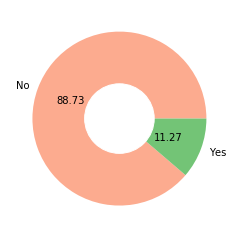

In [149]:
# only 11.70 % customer agreed to subscribe to a term deposit 

In [150]:
# lets look other variables
df.age.max()

98

In [151]:
df['bin'] = pd.cut(df['age'], bins=range(18,98,10), labels=[f'{l}-{l+10}' for l in range(18,88,10)])

In [153]:
df.bin.head()

0    48-58
1    48-58
2    28-38
3    38-48
4    48-58
Name: bin, dtype: category
Categories (7, object): [18-28 < 28-38 < 38-48 < 48-58 < 58-68 < 68-78 < 78-88]

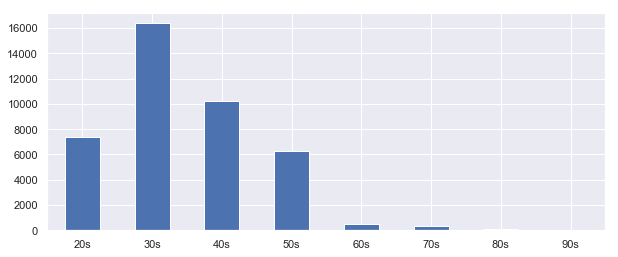

In [254]:
import matplotlib.pyplot as plt
out = pd.cut(df.age, bins=[18, 30, 40, 50, 60, 70, 80, 90, 100], include_lowest=True)
ax = out.value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(10,4))
ax.set_xticklabels(['20s','30s','40s','50s','60s','70s','80s','90s'])
plt.show()

0          (50.0, 60.0]
1          (50.0, 60.0]
2          (30.0, 40.0]
3          (30.0, 40.0]
4          (50.0, 60.0]
5          (40.0, 50.0]
6          (50.0, 60.0]
7          (40.0, 50.0]
8        (17.999, 30.0]
9        (17.999, 30.0]
10         (40.0, 50.0]
11       (17.999, 30.0]
12       (17.999, 30.0]
13         (50.0, 60.0]
14         (30.0, 40.0]
15         (50.0, 60.0]
16         (30.0, 40.0]
17         (40.0, 50.0]
18         (40.0, 50.0]
19         (30.0, 40.0]
20       (17.999, 30.0]
21         (50.0, 60.0]
22         (50.0, 60.0]
23         (40.0, 50.0]
24         (30.0, 40.0]
25         (30.0, 40.0]
26         (50.0, 60.0]
27         (30.0, 40.0]
28         (50.0, 60.0]
29         (50.0, 60.0]
              ...      
41158      (30.0, 40.0]
41159      (30.0, 40.0]
41160      (30.0, 40.0]
41161      (30.0, 40.0]
41162      (50.0, 60.0]
41163      (30.0, 40.0]
41164      (50.0, 60.0]
41165      (30.0, 40.0]
41166      (30.0, 40.0]
41167      (30.0, 40.0]
41168      (30.0

In [127]:
x = df.groupby('y').age

In [131]:
x.get_group("yes").values

array([59, 56, 41, ..., 51, 71, 72], dtype=int64)

In [104]:
grouped_df = df.groupby('y')


In [109]:
yes_age = grouped_df.get_group("yes").age.values
no_age = grouped_df.get_group("no").age.values

array([59, 56, 41, ..., 51, 71, 72], dtype=int64)

In [112]:
age_counts = df.age.value_counts()
fig = plt.bar(age_counts, title="Age of respondents")
fig.update_layout(
    xaxis_title = "Age",
    yaxis_title = "Frequency",
    title_x = 0.5, 
    showlegend = False
)
fig.show()

TypeError: bar() missing 1 required positional argument: 'height'

In [247]:
import seaborn as sns
plt = sns.barplot(x='education', y='balance', hue ='y')

ValueError: Could not interpret input 'education'

In [248]:
sns.scatterplot(data=df, x="age", y="balance", hue="y")


ValueError: Could not interpret input 'balance'

In [41]:
# model preprocessing stage
df = df.replace(to_replace = ['yes','no'],value = ['1','0'])

In [4]:
num_cols = df._get_numeric_data().columns

In [5]:
num_cols

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [6]:
cat_cols = list(set(df.columns) - set(num_cols))
print(cat_cols)

['education', 'contact', 'housing', 'deposit', 'poutcome', 'marital', 'month', 'loan', 'default', 'job']


In [7]:
def find_cat_cols(df):
    num_cols = list(df._get_numeric_data().columns)
    cat_cols = list(set(df.columns) - set(num_cols))
    print("Found {0} Numerical columns in DataFrame".format(len(num_cols)))
    print("Found {0} Categorical columns in DataFrame".format(len(cat_cols)))
    return num_cols, cat_cols
    

In [8]:
num_cols,cat_cols = find_cat_cols(df)

Found 7 Numerical columns in DataFrame
Found 10 Categorical columns in DataFrame


In [9]:
num_cols

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [10]:
df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.112300,-0.000762,0.000189,-0.005278,0.002774,0.020169
balance,0.112300,1.000000,0.010467,0.022436,-0.013894,0.017411,0.030805
day,-0.000762,0.010467,1.000000,-0.018511,0.137007,-0.077232,-0.058981
duration,0.000189,0.022436,-0.018511,1.000000,-0.041557,-0.027392,-0.026716
campaign,-0.005278,-0.013894,0.137007,-0.041557,1.000000,-0.102726,-0.049699
pdays,0.002774,0.017411,-0.077232,-0.027392,-0.102726,1.000000,0.507272
previous,0.020169,0.030805,-0.058981,-0.026716,-0.049699,0.507272,1.000000


In [11]:
corr = df.corr()

In [12]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

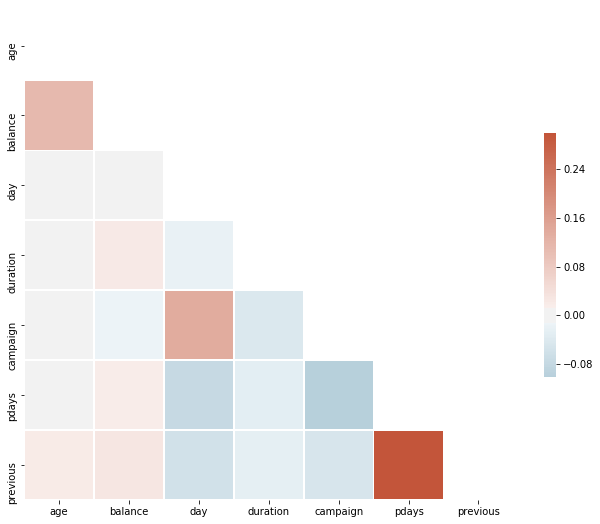

In [13]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [16]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [17]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


In [19]:
import matplotlib.pyplot as plt

ValueError: scatter requires x column to be numeric

'ls' is not recognized as an internal or external command,
operable program or batch file.
